<a href="https://colab.research.google.com/github/HoYoungChun/financial_data_analysis/blob/main/%EC%B6%94%EC%84%B8%ED%88%AC%EC%9E%90%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [3]:
import pandas as pd
import requests
import numpy as np
from tqdm import tqdm

### Get KOSPI 200 market data(Daily)

In [4]:
kodex_200 = pd.DataFrame()

kodex_url = 'https://finance.naver.com/item/sise_day.nhn?code=069500'

for page in tqdm(range(1,100)):
    pg_url = '{url}&page={page}'.format(url=kodex_url, page=page)
    pg_url = requests.get(pg_url, headers={'User-agent':'Mozilla/5.0'}).text
    kodex_200 = kodex_200.append(pd.read_html(pg_url)[0], ignore_index=True)
    #pd.read_html(pg_url)[0]
kodex_200

100%|██████████| 99/99 [01:00<00:00,  1.64it/s]


,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.07.14,43405.0,145.0,43400.0,43465.0,43225.0,1249603.0
2,2021.07.13,43550.0,365.0,43380.0,43565.0,43380.0,3654600.0
3,2021.07.12,43185.0,385.0,43060.0,43260.0,43060.0,3929269.0
4,2021.07.09,42800.0,460.0,42840.0,43050.0,42445.0,8288519.0
...,...,...,...,...,...,...,...
1480,2017.07.10,31305.0,105.0,31300.0,31390.0,31220.0,4338365.0
1481,2017.07.07,31200.0,125.0,31200.0,31285.0,31115.0,5436532.0
1482,2017.07.06,31325.0,5.0,31395.0,31395.0,31240.0,6394300.0
1483,2017.07.05,31320.0,120.0,31125.0,31355.0,31115.0,5744072.0


In [5]:
kodex_200 = kodex_200.dropna()
kodex_200.columns = ['date','close','over_the_day','open','high','low','volume']
kodex_200.date = pd.to_datetime(kodex_200.date)

print('출처: ', kodex_url)
print(kodex_200.shape)
kodex_200.head()

출처:  https://finance.naver.com/item/sise_day.nhn?code=069500
(990, 7)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,close,over_the_day,open,high,low,volume
1,2021-07-14,43405.0,145.0,43400.0,43465.0,43225.0,1249603.0
2,2021-07-13,43550.0,365.0,43380.0,43565.0,43380.0,3654600.0
3,2021-07-12,43185.0,385.0,43060.0,43260.0,43060.0,3929269.0
4,2021-07-09,42800.0,460.0,42840.0,43050.0,42445.0,8288519.0
5,2021-07-08,43260.0,455.0,43765.0,43875.0,43260.0,5209381.0


In [ ]:
movg_90 = kodex_200.close.rolling(window=90).mean()
movg_90.head(90)

In [13]:
kodex_200['MAVG_90'] = movg_90
kodex_200 = kodex_200.dropna()
kodex_200

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,close,over_the_day,open,high,low,volume,MAVG_90
133,2021-03-09,41215.0,260.0,41485.0,41540.0,40565.0,11896444.0,42887.777778
136,2021-03-08,41475.0,395.0,42250.0,42250.0,41390.0,8296841.0,42866.333333
137,2021-03-05,41870.0,225.0,41470.0,42005.0,41235.0,10363864.0,42847.666667
138,2021-03-04,42095.0,545.0,42095.0,42435.0,41790.0,6777655.0,42835.555556
139,2021-03-03,42640.0,470.0,42070.0,42650.0,41925.0,6142052.0,42833.777778
...,...,...,...,...,...,...,...,...
1479,2017-07-11,31480.0,175.0,31345.0,31500.0,31300.0,4983074.0,32014.722222
1480,2017-07-10,31305.0,105.0,31300.0,31390.0,31220.0,4338365.0,31989.666667
1481,2017-07-07,31200.0,125.0,31200.0,31285.0,31115.0,5436532.0,31965.722222
1482,2017-07-06,31325.0,5.0,31395.0,31395.0,31240.0,6394300.0,31944.000000


## Visulization

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

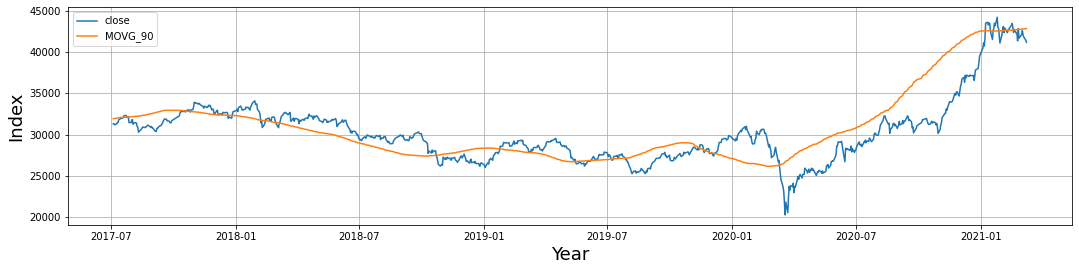

In [16]:
plt.figure(figsize=(18,4))

plt.plot(kodex_200.date, kodex_200.close, label='close')
plt.plot(kodex_200.date, kodex_200.MAVG_90, label='MOVG_90')

plt.legend(loc='best')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Index', fontsize=18)
plt.grid()

plt.show()